# ML Lab 3
---
#### Shreyansh Saha | 17BCE1148
# Import Data and check data

In [2]:
import pandas as pd
import numpy as np
dataset = pd.read_csv("../Datasets/regression/Dataset.csv")
dataset.head()

Sl.No.  Load  Biogas flow rate  methane fraction  Intake temperature   CO2  \
0       1     5                 2                50                  35  3.38   
1       2     5                 2                65                  35  3.32   
2       3     5                 2                80                  35  3.09   
3       4     5                 2               100                  35  2.98   
4       5    10                 2                50                  35  4.61   

     CO   HC     O2  Smoke  ...     dp/dt    ID    CD  CA50   Max. HRR  \
0  0.13  105  15.92   35.0  ...  2.326593  26.0  82.0  38.0  21.492709   
1  0.12  143  15.95   33.0  ...  2.561082  26.0  92.0  39.0  23.522741   
2  0.13  167  15.97   33.0  ...  2.509624  25.0  88.0  40.0  26.273389   
3  0.15  189  16.00   31.0  ...  2.257887  26.0  69.0  25.0  20.869492   
4  0.12  107  14.13   41.0  ...  3.608106  24.0  80.0  34.0  31.025659   

                BSFC  CO2.1               HC.1              CO.1  \
0  0.475257790523249   3.38   1.36018455543218  36.2715881448582   
1  0.477607276110149   3.32   1.87808095602049  33.9448736537323   
2  0.474288317410197   3.09   2.18296780197086  36.6006577575953   
3   0.47849889664372   2.98   2.48372901170047  42.4569061829139   
4    0.3075726247757   4.61  0.718109040183129  17.3461277858757   

                NOx  
0  2.86983994113163  
1  3.15202398213229  
2  3.55951451818372  
3   3.1236152406001  
4  4.13519296324002  

[5 rows x 33 columns]

In [3]:
dataset.columns

Index(['Sl.No.', 'Load', 'Biogas flow rate', 'methane fraction',
       'Intake temperature', 'CO2', 'CO', 'HC', 'O2', 'Smoke', 'Nox',
       'Pb (kW)', 'ṁf1 (kg/s)', 'ṁf2 (kg/s)', '% pilot fuel',
       '% Energy of pilot', 'ɳBT (%)', 'ɳvol (%)', 'BSEC ', 'A/F Ratio', 'ER',
       'Pm', 'Pm(CA)', 'dp/dt', 'ID', 'CD', 'CA50', 'Max. HRR', 'BSFC',
       'CO2.1', 'HC.1', 'CO.1', 'NOx'],
      dtype='object')

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 327 entries, 0 to 326
Data columns (total 33 columns):
Sl.No.                327 non-null int64
Load                  327 non-null int64
Biogas flow rate      327 non-null int64
methane fraction      327 non-null int64
Intake temperature    327 non-null int64
CO2                   327 non-null float64
CO                    327 non-null float64
HC                    327 non-null int64
O2                    327 non-null float64
Smoke                 327 non-null float64
Nox                   327 non-null int64
Pb (kW)               327 non-null float64
ṁf1 (kg/s)            327 non-null float64
ṁf2 (kg/s)            327 non-null float64
% pilot fuel          327 non-null float64
% Energy of pilot     327 non-null float64
ɳBT (%)               327 non-null float64
ɳvol (%)              327 non-null float64
BSEC                  327 non-null object
A/F Ratio             327 non-null float64
ER                    327 non-null float64
Pm     

## Checking for null & invalid values

In [5]:
dataset.isnull().sum()

Sl.No.                0
Load                  0
Biogas flow rate      0
methane fraction      0
Intake temperature    0
CO2                   0
CO                    0
HC                    0
O2                    0
Smoke                 0
Nox                   0
Pb (kW)               0
ṁf1 (kg/s)            0
ṁf2 (kg/s)            0
% pilot fuel          0
% Energy of pilot     0
ɳBT (%)               0
ɳvol (%)              0
BSEC                  0
A/F Ratio             0
ER                    0
Pm                    2
Pm(CA)                2
dp/dt                 2
ID                    2
CD                    2
CA50                  2
Max. HRR              2
BSFC                  0
CO2.1                 0
HC.1                  0
CO.1                  0
NOx                   0
dtype: int64

**Since there are very few null values, we can just drop them. But let us fill them with their mean for now**

In [6]:
datasetCleaned = dataset.fillna(np.mean(dataset))
datasetCleaned.shape

(327, 33)

**Some values are not integer so we can remove them**

In [7]:
datasetCleaned = datasetCleaned[dataset['BSEC ']!="#DIV/0!"]
datasetCleaned.shape

(326, 33)

# Analyse data

In [8]:
datasetCleaned.columns

Index(['Sl.No.', 'Load', 'Biogas flow rate', 'methane fraction',
       'Intake temperature', 'CO2', 'CO', 'HC', 'O2', 'Smoke', 'Nox',
       'Pb (kW)', 'ṁf1 (kg/s)', 'ṁf2 (kg/s)', '% pilot fuel',
       '% Energy of pilot', 'ɳBT (%)', 'ɳvol (%)', 'BSEC ', 'A/F Ratio', 'ER',
       'Pm', 'Pm(CA)', 'dp/dt', 'ID', 'CD', 'CA50', 'Max. HRR', 'BSFC',
       'CO2.1', 'HC.1', 'CO.1', 'NOx'],
      dtype='object')

# Visualize data columns

### Make all coumns as float which are objects

In [9]:
datasetCleaned['BSEC'] = datasetCleaned['BSEC '].astype('float')
datasetCleaned['BSFC'] = datasetCleaned['BSFC'].astype('float')
datasetCleaned['HC.1'] = datasetCleaned['HC.1'].astype('float')
datasetCleaned['CO.1'] = datasetCleaned['CO.1'].astype('float')
datasetCleaned['NOx'] = datasetCleaned['NOx'].astype('float')
datasetCleaned = datasetCleaned.drop(['BSEC ', 'Sl.No.'], axis=1)
datasetCleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 326 entries, 0 to 326
Data columns (total 32 columns):
Load                  326 non-null int64
Biogas flow rate      326 non-null int64
methane fraction      326 non-null int64
Intake temperature    326 non-null int64
CO2                   326 non-null float64
CO                    326 non-null float64
HC                    326 non-null int64
O2                    326 non-null float64
Smoke                 326 non-null float64
Nox                   326 non-null int64
Pb (kW)               326 non-null float64
ṁf1 (kg/s)            326 non-null float64
ṁf2 (kg/s)            326 non-null float64
% pilot fuel          326 non-null float64
% Energy of pilot     326 non-null float64
ɳBT (%)               326 non-null float64
ɳvol (%)              326 non-null float64
A/F Ratio             326 non-null float64
ER                    326 non-null float64
Pm                    326 non-null float64
Pm(CA)                326 non-null float64
dp/d

## Boxplot 
Few of the columns have many outliars

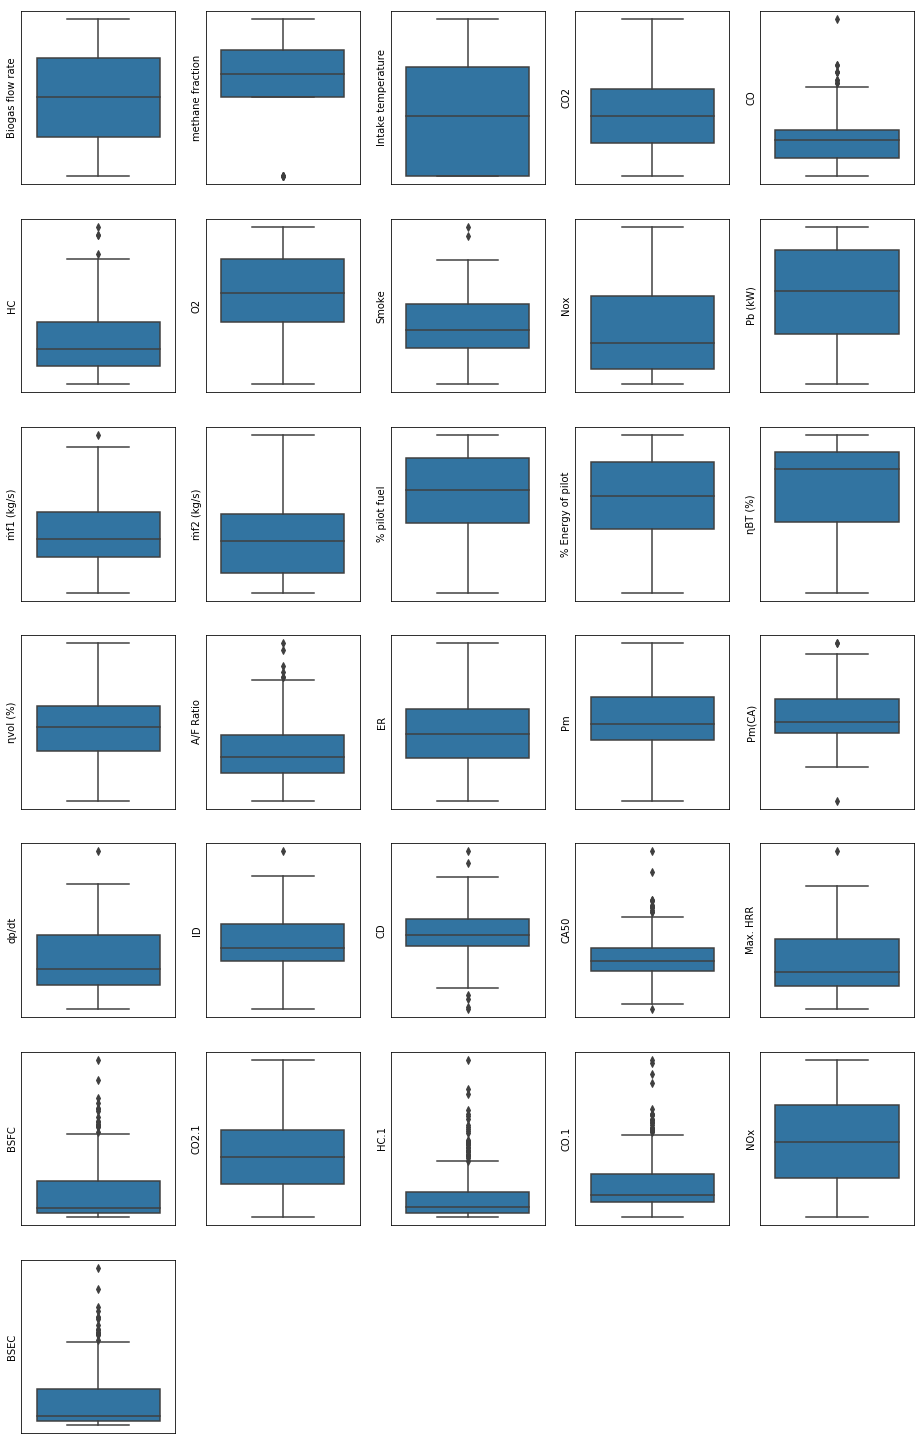

In [11]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

matplotlib.rcParams['figure.figsize'] = (16, 30)

for i in range(1, len(datasetCleaned.columns)):
    plt.subplot(8, 5, i)
    sns.boxplot(datasetCleaned[datasetCleaned.columns[i]], orient='v')
    plt.xticks([])
    plt.yticks([])

## Plot distribution
Most of the data is follows normal distribution which is good for regression. But many columns are skewed which needs to be fixed.

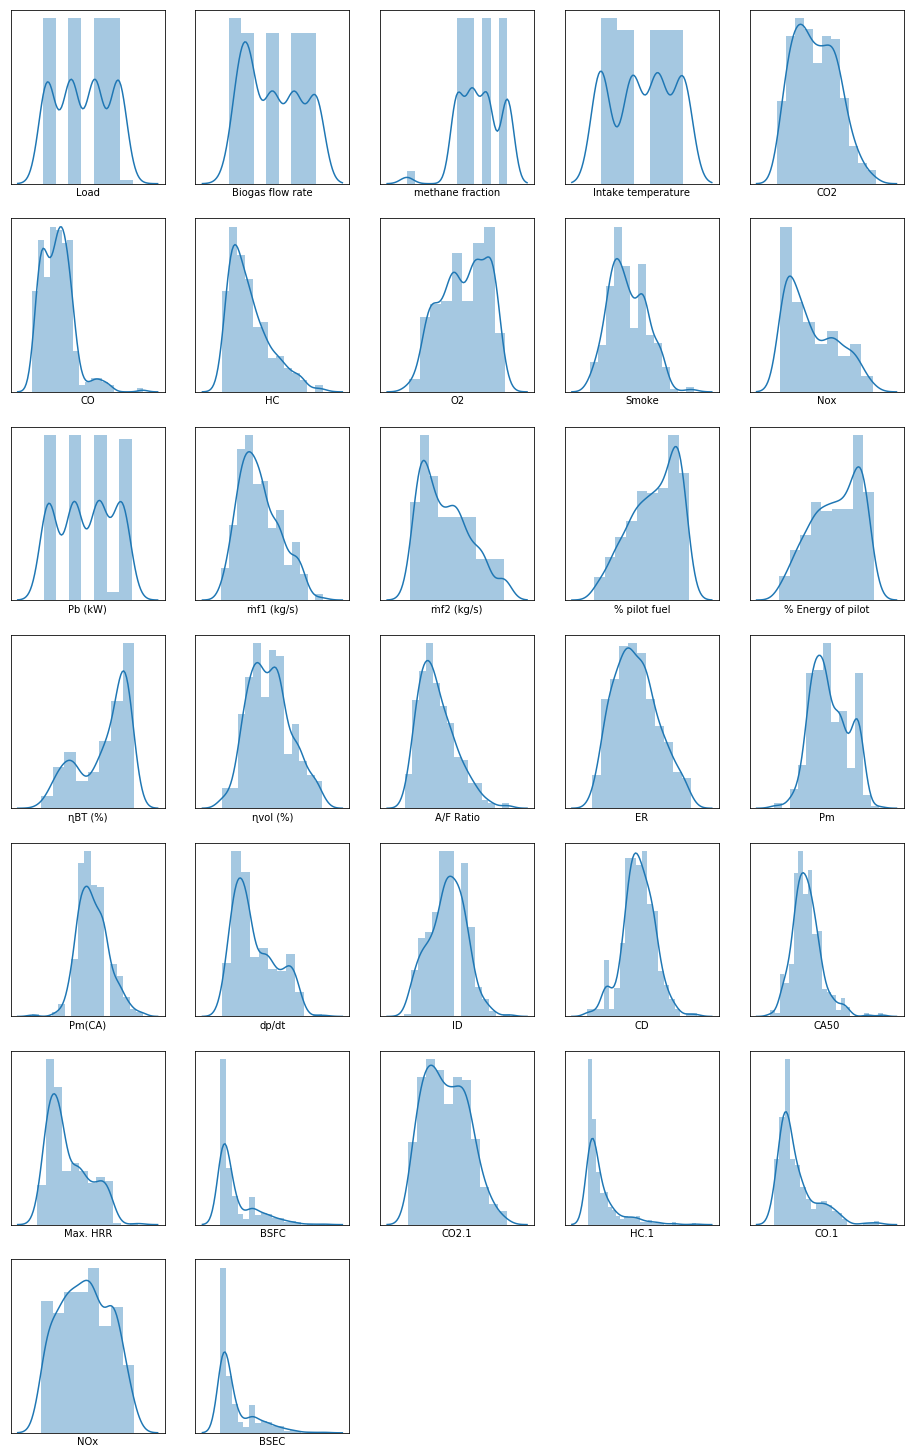

In [12]:
# matplotlib.rcParams['figure.figsize'] = (15, 15)
for i in range(len(datasetCleaned.columns)):
    plt.subplot(8, 5, i+1)
    sns.distplot(datasetCleaned[datasetCleaned.columns[i]])
    plt.xticks([])
    plt.yticks([])

## Check stats of all columns

In [14]:
import pandas_profiling
dataset.profile_report()

### Get high correlated columns for each column

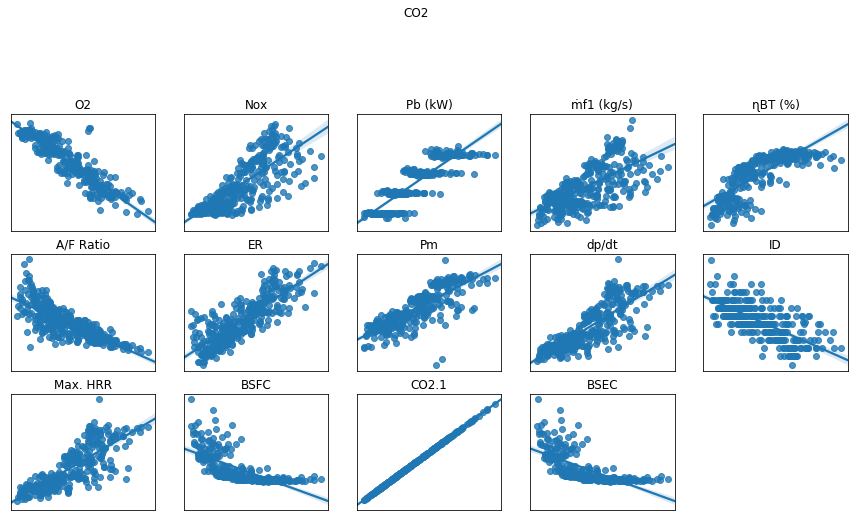

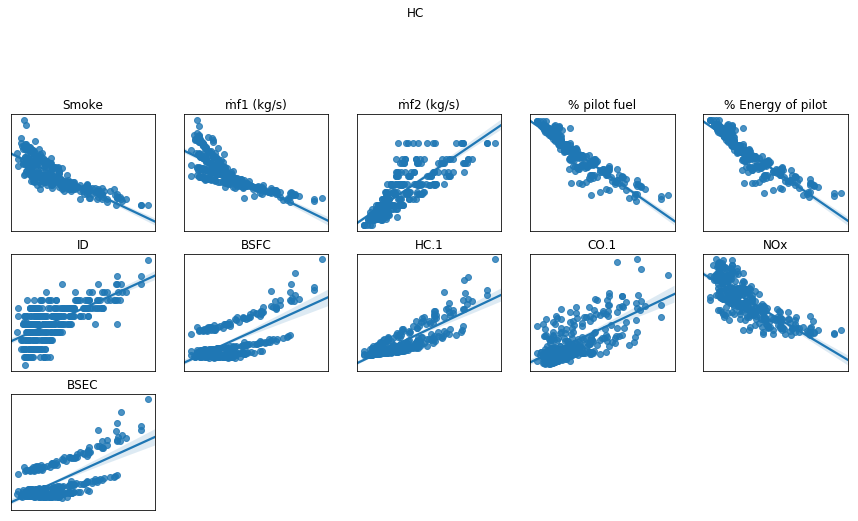

In [15]:
for i in list(correlatedColumns.keys())[3:5]:
    regplot(i)

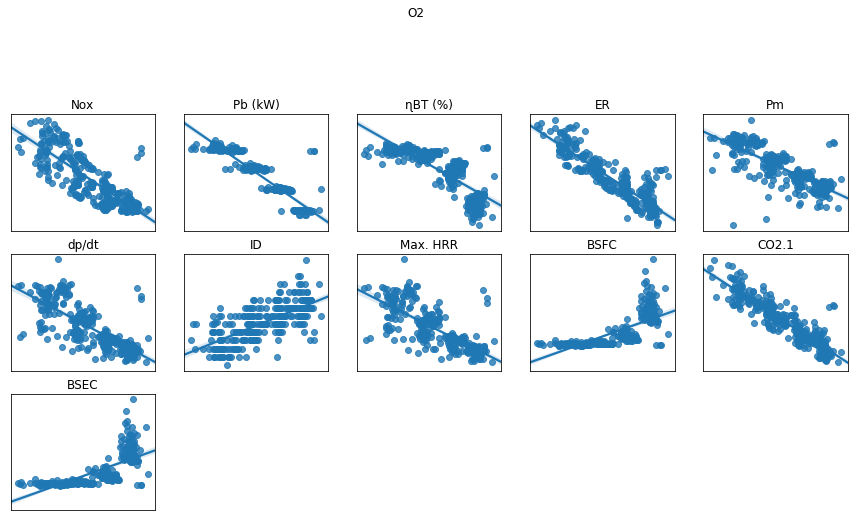

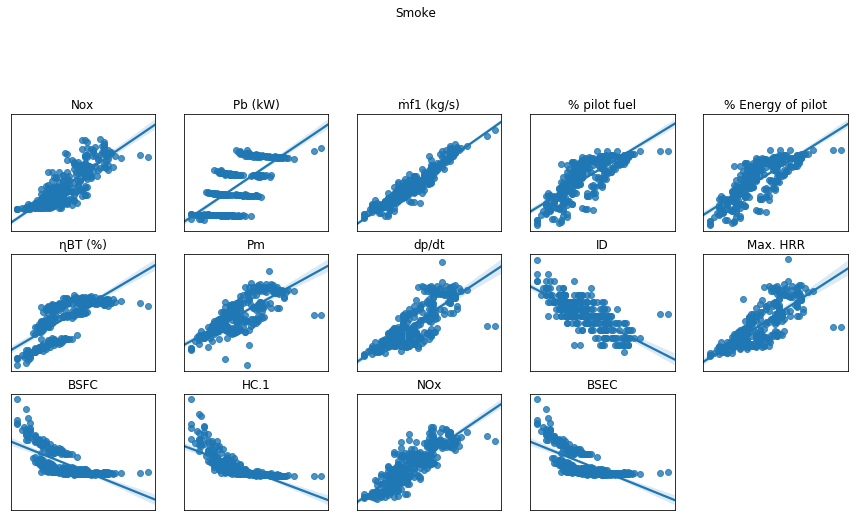

In [16]:
for i in list(correlatedColumns.keys())[5:7]:
    regplot(i)

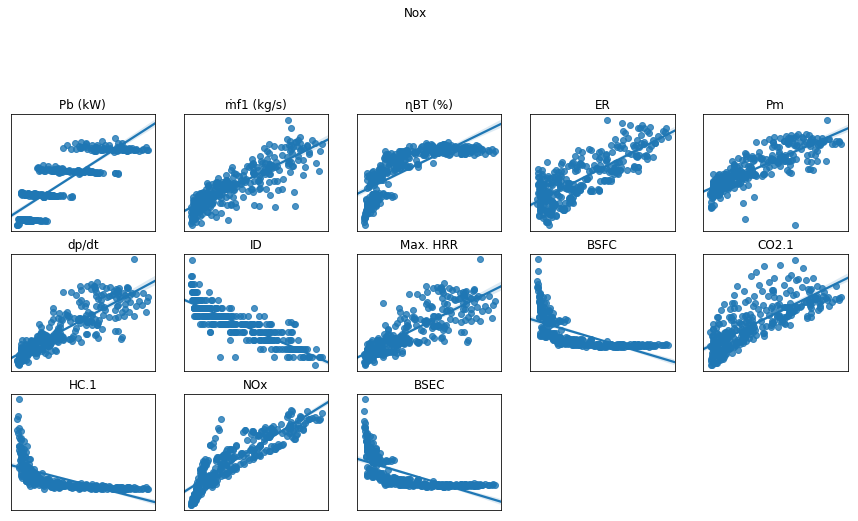

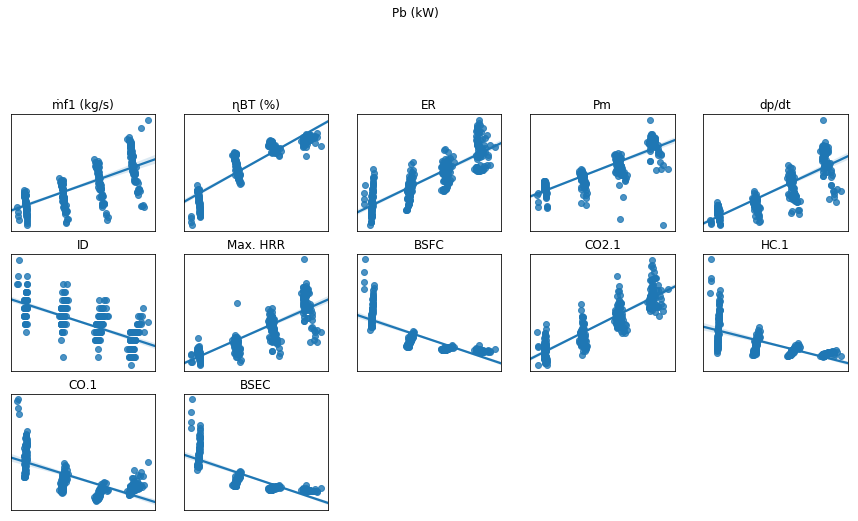

In [17]:
for i in list(correlatedColumns.keys())[7:9]:
    regplot(i)

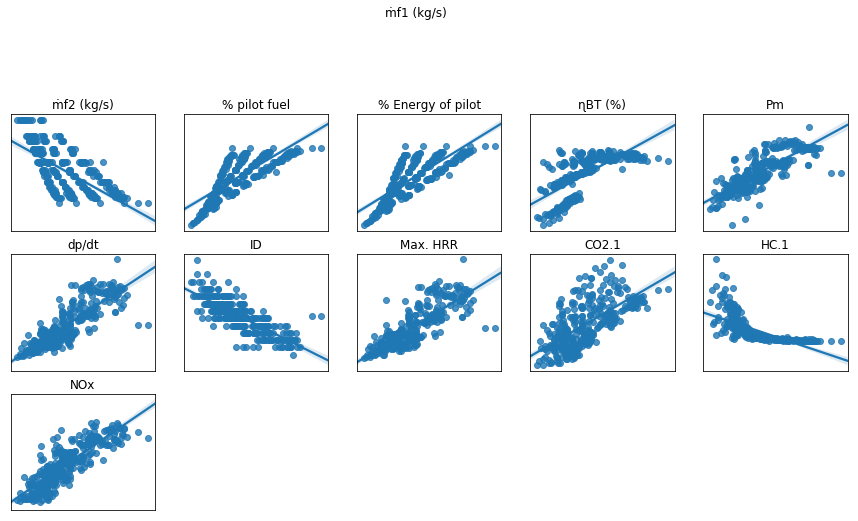

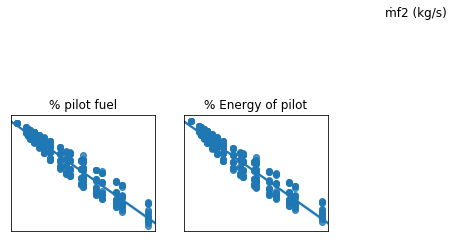

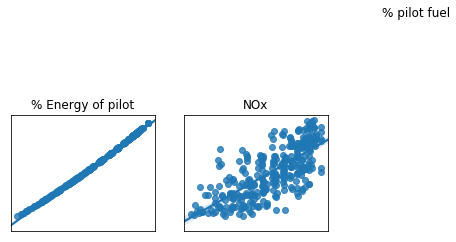

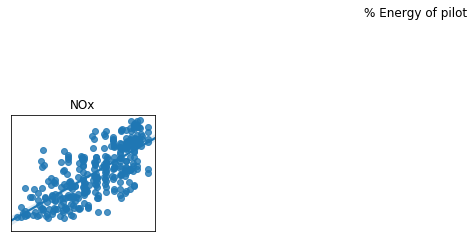

In [18]:
for i in list(correlatedColumns.keys())[9:13]:
    regplot(i)

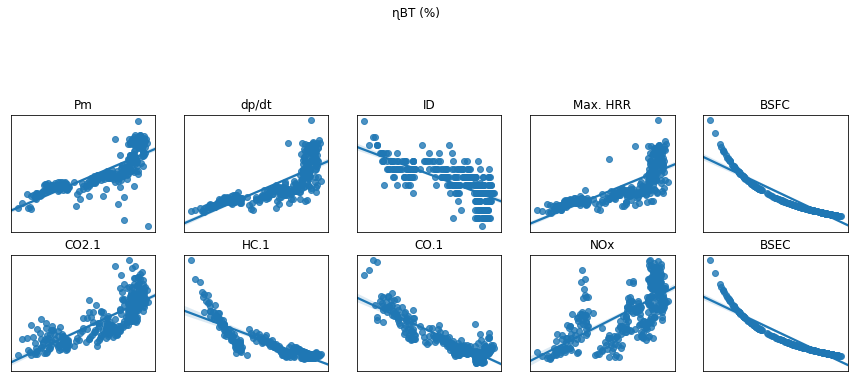

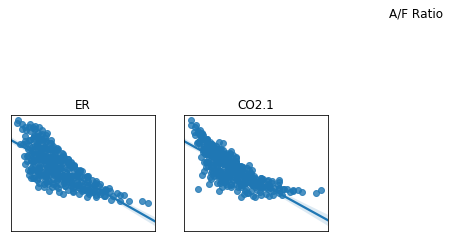

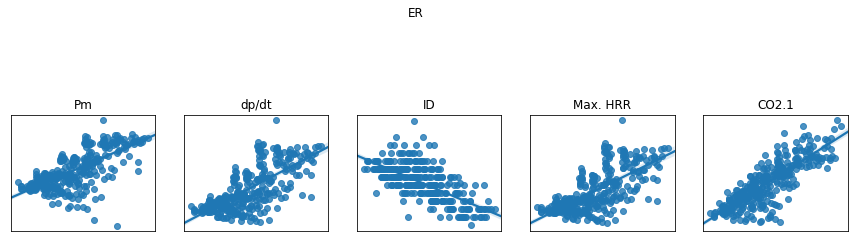

In [19]:
for i in list(correlatedColumns.keys())[13:16]:
    regplot(i)

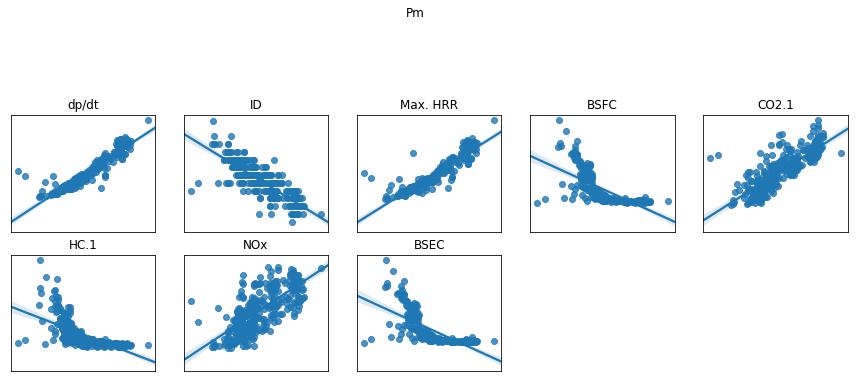

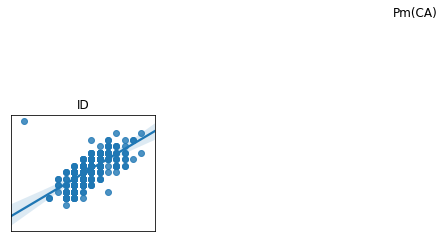

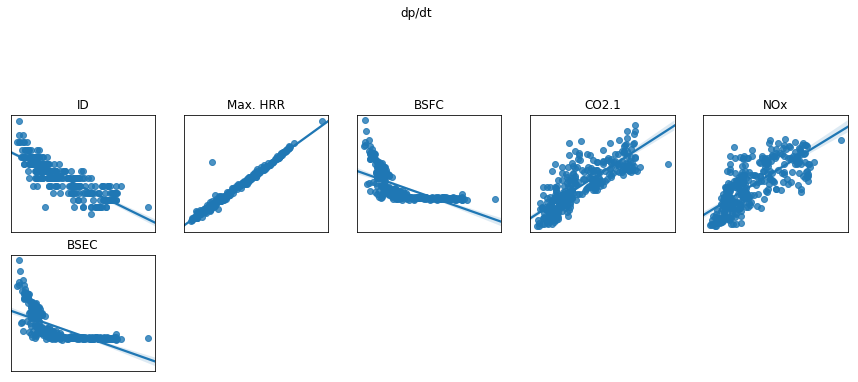

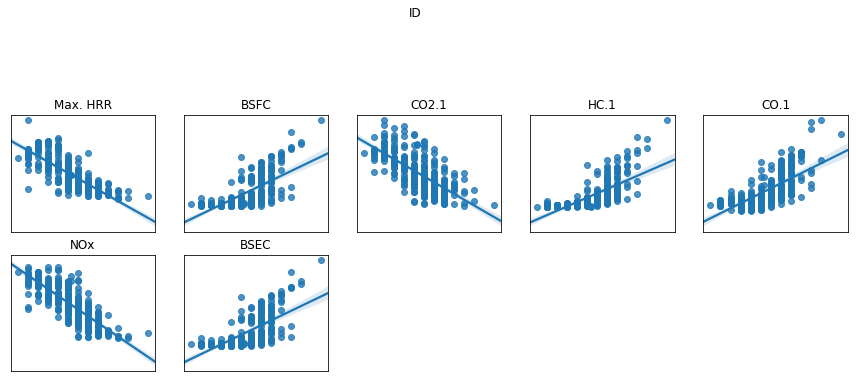

In [20]:
for i in list(correlatedColumns.keys())[16:20]:
    regplot(i)

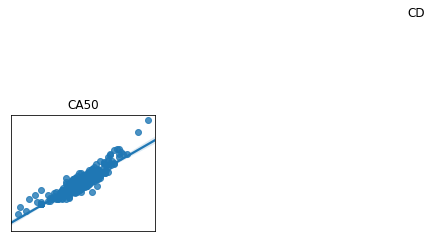

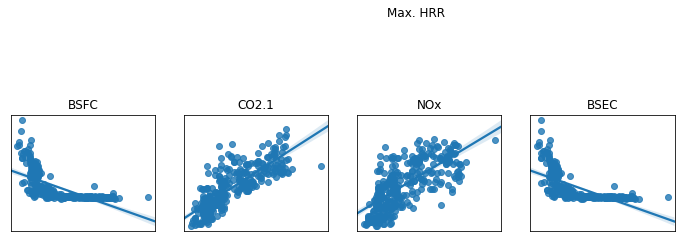

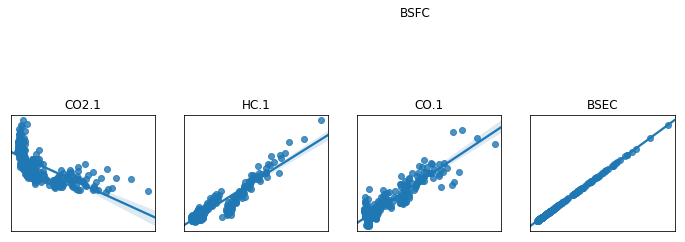

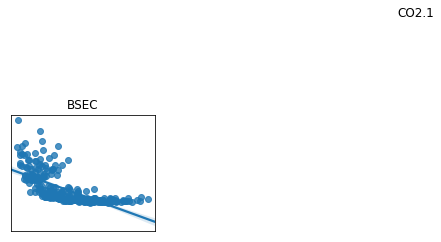

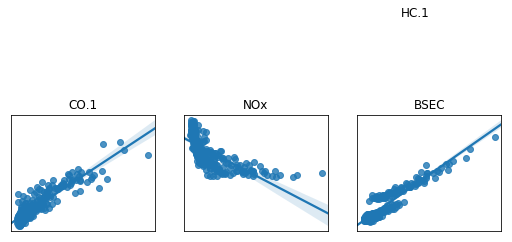

In [21]:
for i in list(correlatedColumns.keys())[20:-1]:
    regplot(i)

### There are some very important insights from the data:
- Load and Intake Temperature are categorical and can be arrange in bins of low, medium, high, extreme. So we divide them into 4 bins.
- C0.1, BSFC, nBT, HC.1 and BFEC have polynomial bin wrt Load
- Biogas flow rate is also categorical but in 6 bins
- CO2 shows linear model for many columns but:
	+ CO2 is categorical with respect to Pb
	+ nBT, A/F Ratio, BSFC and BSEC are almost polynomial rather than linear
	+ CO2.1 has perfect correlation
- ID is categorical with many bins so it can be regarded as continous for now
- HC is 
	+ Polynomial with ID, NOx
	+ In 2 categories for BSFC and BSEC which are almost same
- Pb is caletorical in bins of 4 for all columns
- BSEC and BSFC are in two main regions but they follow pattern in those regions
- Pilot fuel and Energy of pilot are same and so are BSEC and BSFC
- nBT, BSEC and BSFC always follow polynomial pattern
- mf2 is categorial with many bins, so it can also be regarded as continous

- BSFC and BSEC have perfect polynomial kernel with nBT
- Highly correlated columns: Which can be merged
	+ CO2 and CO2.1, Positive
	+ Pilot fuel and Energy of pilot, Positive
	+ dp/dt and Max HRR, Positive
	+ Max HRR and BSEC, Positive


Lets out check out the columns we want to merge

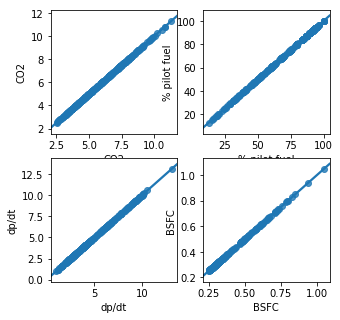

In [22]:
columnsMerge = [('CO2', 'CO2.1'), ('% pilot fuel', '% Energy of pilot'), ('dp/dt','Max. HRR'), ('BSFC', 'BSEC')]
matplotlib.rcParams['figure.figsize'] = (5, 5)
plt.figure()
for i in range(len(columnsMerge)):
    plt.subplot(2, 2, i+1)
    sns.regplot(x=columnsMerge[i][0], y=columnsMerge[i][0], data=datasetCleaned)
plt.show()

Lets remove the columns which had no correlation to other columns

In [23]:
usefulColumns = set({})
for i in correlatedColumns.keys():
    usefulColumns.add(i)
usefulColumns = list(usefulColumns)
print("Columns: ",", ".join(usefulColumns))

Columns:  ṁf1 (kg/s), Pm(CA), % Energy of pilot, ID, Max. HRR, ɳBT (%), Biogas flow rate, Nox, dp/dt, CD, HC, Smoke, HC.1, Pb (kW), Load, O2, BSFC, CO.1, Intake temperature, CO2.1, A/F Ratio, ṁf2 (kg/s), CO2, ER, % pilot fuel, Pm


We reduced columns form 33 to 26 useful columns.

In [24]:
len(usefulColumns)

26